In [1]:
from pathlib import Path
import tifffile
import matplotlib.pyplot as plt


D:\miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\miniconda\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
D:\miniconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Low-Level Tiff Processing: Tifffile for Reading Tiff files

## Loading Files

### File Browser UI

In [2]:
fname = Path(tifffile.askopenfilename())
assert 'tif' in fname.suffix
tif = tifffile.TiffFile(fname)
tif

### From Path

In [3]:
fname = Path("../../data/raw/ExPW021_PW162-A05_Scan1_[10275,40702]_component_data.tif")
assert fname.exists()
assert 'tif' in fname.suffix
tif = tifffile.TiffFile(fname)
tif

In [ ]:
tif.asarray

## Extract Image as Numpy Array

### From a TiffFile object

In [4]:
im = tif.asarray()
im.shape, im.dtype

((1, 1396, 1860), dtype('float32'))

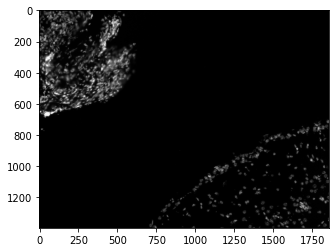

In [5]:
plt.imshow(im[0], cmap='gray');

### Directly from the Filename

In [6]:
im = tifffile.imread(fname)
im.shape, im.dtype

((1, 1396, 1860), dtype('float32'))

In [7]:
im2 = plt.imread(fname)
im2.shape

(1396, 1860, 4)

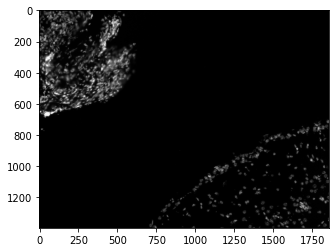

In [32]:
plt.imshow(im[0], cmap='gray');

## Writing Tiffs

### Using the TiffWriter object

In [12]:
writer = tifffile.TiffWriter("./test.tif", )
writer

In [15]:
writer.write(data=im, metadata={"Author": "Johannes Kohl", "Lab": "Kohl Lab"}

SyntaxError: unexpected EOF while parsing (<ipython-input-15-20e74d6d7a4a>, line 1)

In [16]:
writer.close()

### Using the imwrite function

In [17]:
tifffile.imwrite("./test2.tif", data=im, metadata={"Author": "Johannes Kohl", "Lab": "Kohl Lab"})

### Extract Tifffile-saved Metadata

In [18]:
f = tifffile.TiffFile("./test.tif")
f

TiffPages: file contains no pages


In [31]:
{attr for attr in dir(f) if 'metadata' in attr}

{'andor_metadata',
 'eer_metadata',
 'epics_metadata',
 'fei_metadata',
 'fluoview_metadata',
 'geotiff_metadata',
 'imagej_metadata',
 'lsm_metadata',
 'mdgel_metadata',
 'metaseries_metadata',
 'micromanager_metadata',
 'nih_metadata',
 'ome_metadata',
 'philips_metadata',
 'pilatus_metadata',
 'scanimage_metadata',
 'scn_metadata',
 'sem_metadata',
 'shaped_metadata',
 'sis_metadata',
 'stk_metadata',
 'tvips_metadata'}

In [51]:
f.shaped_metadata[0]

{'Author': 'Johannes Kohl', 'Lab': 'Kohl Lab', 'shape': [1, 1396, 1860]}

In [52]:
f.close()